In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
df.shape

(2443651, 9)

In [5]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [6]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1589747,1790444,B07T43FJYS,Personalised Gifts for Teachers - Teacher Than...,4.5,14,5.95,False,0,Handmade Home Décor
1237778,1371284,B075V4JS5S,Callaway Men's Big & Tall Opti-Soft Short Slee...,0.0,0,69.49,False,0,Sports & Outdoors
174499,186849,B001LM0JMA,Creation Lamis Senorita Lamis EDP Spray for La...,3.3,9,21.49,False,0,Fragrances
437925,470506,B07WHJ2RR6,Queen Baseball Cap Classic Crest Band Logo Boh...,4.7,4,13.00,False,0,Sports & Outdoors
238157,254194,B08KFHNKF6,"Copper Style Hanging Bird Feeders Seed, Peanut...",4.5,30,9.99,False,0,Bird & Wildlife Care


# PART 1:

### frequency table for category:
    

In [7]:
category_frequency=df['category'].value_counts()
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [8]:
category_tab = pd.concat([category_frequency], axis=1)
category_tab

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


### The top 5 most listed product categories:

In [9]:
top_five_categories = category_frequency.head(5)
print(f"The top 5 most listed categories are :{top_five_categories}")

The top 5 most listed categories are :category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


### Visualizations:

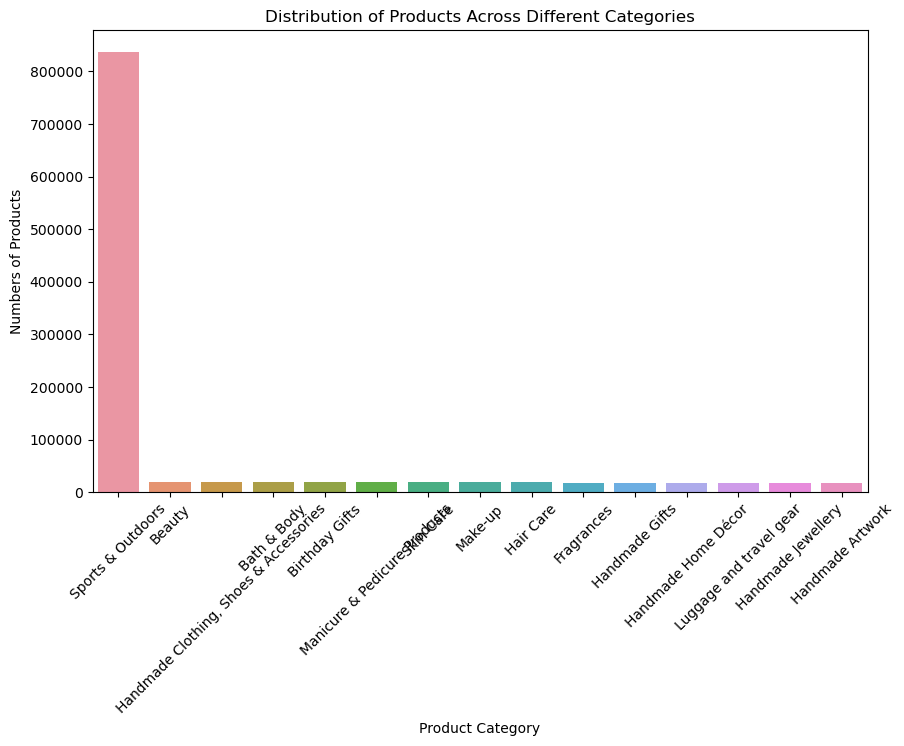

In [10]:
#1
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index[:15])
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Product Category')
plt.ylabel('Numbers of Products')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

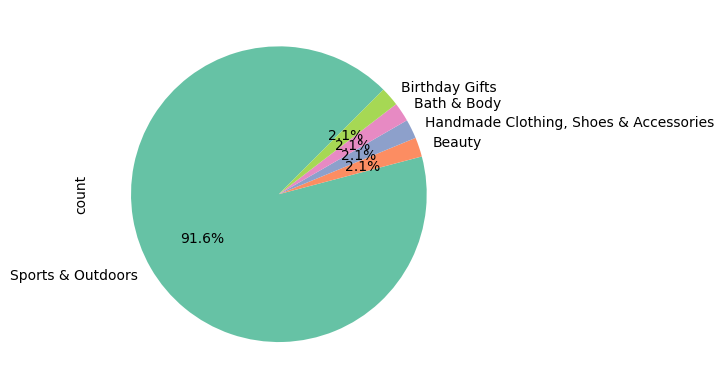

In [11]:
top_five_categories.plot.pie(autopct='%1.1f%%',startangle=45, colors=sns.color_palette('Set2'))

# Part 2: Delving into Product Pricing:

### Measures of Centrality

In [12]:
price_description = df['price'].describe()
price_description

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [13]:
median_price = df['price'].median()
median_price

19.09

In [14]:
mode_price = df['price'].mode()
mode_price

0    9.99
Name: price, dtype: float64

The average is the mean.

In [15]:
price_skewness=df.price.skew().round(2)
price_skewness

27.49

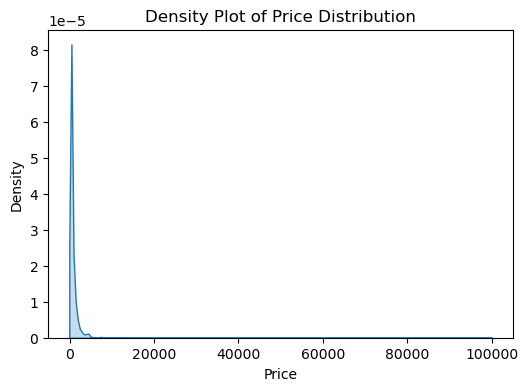

In [71]:
plt.figure(figsize=(6,4))  
sns.kdeplot(df['price'], fill=True)
plt.title('Density Plot of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


The price distribution is positively skewed, indicating a longer tail on the right side.
Therefore, the mean is likely to be higher than the mode.

### Measures of Dispersion:

In [17]:
# dertermination of variance:

price_var=df['price'].var()
price_var

119445.48532256528

In [18]:
#standard dev: 
price_std=df['price'].std()
price_std

345.60886175352226

In [19]:
#price range:

price_range = df['price'].max() - df['price'].min()
price_range

100000.0

In [20]:
#interquartile:
interquartile_range = price_description['75%'] - price_description['25%']
interquartile_range

36.0

In [21]:
if price_std > 0.2 * df['price'].mean() or price_range > 0.2 * df['price'].mean() or interquartile_range > 0.2 * df['price'].mean():
    print("\nThere are indicators of significant spread in prices.")
else:
    print("\nThere are no indicators of significant spread in prices.")



There are indicators of significant spread in prices.


### Visualizations:

In [22]:
df.price.value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

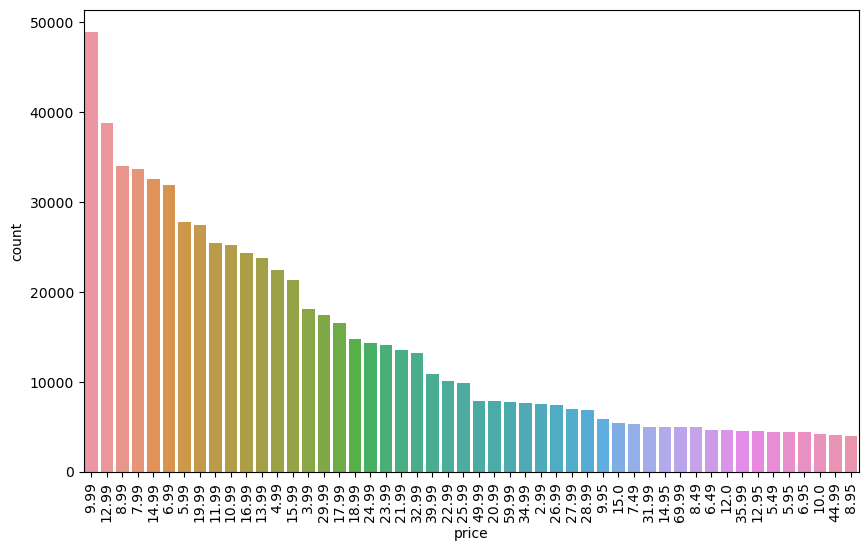

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='price', data=df, order=df['price'].value_counts().index[:50])
plt.xticks(rotation=90)
plt.show()

<Axes: >

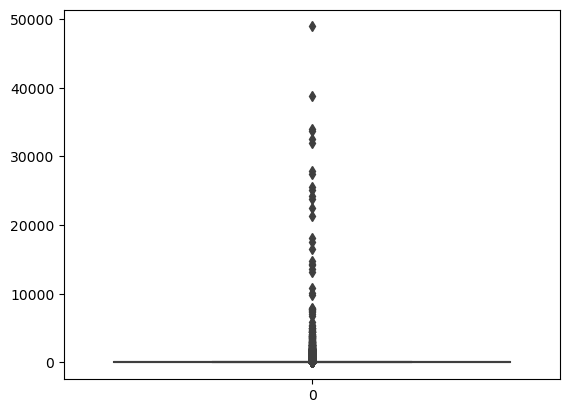

In [41]:
sns.boxplot(data=df.price.value_counts())

# Part 3: Unpacking Product Ratings


In [25]:
rating_column = df['stars']
rating_column

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443646    0.0
2443647    0.0
2443648    0.0
2443649    4.3
2443650    4.5
Name: stars, Length: 2443651, dtype: float64

In [26]:
mean_rating = df['stars'].mean()
mean_rating

2.152836472966065

In [27]:
median_rating = df['stars'].median()
median_rating

0.0

In [28]:
mode_rating = df['stars'].mode()
mode_rating

0    0.0
Name: stars, dtype: float64

Mean Rating: The average rating across all products is approximately 2.15. This indicates that, on average, customers are providing relatively low ratings for products.

Mode Rating: The mode, which is 0, suggests that the most common rating given by customers is 0. This implies that a significant proportion of products may receive very low ratings.

Median Rating: The median, also 0, reinforces the observation that a substantial portion of ratings cluster around 0. This indicates that the distribution of ratings is skewed towards lower values.

### Measures of Dispersion:

In [44]:
stars_description= df['stars'].describe()
stars_description

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [42]:
rating_std=df['stars'].std()
rating_std

2.1948653785054697

In [43]:
rating_var=df['stars'].var()
rating_var

4.81743402976196

In [45]:
interquartile_stars_range = stars_description['75%'] - stars_description['25%']
interquartile_stars_range

4.4

Overall, the ratings show a wide variation in customer feedback rather than being consistent.

### shape of distribution: 


In [55]:
stars_skew=df.stars.skew().round(2)
stars_skew

0.08

Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.

In [56]:
stars_kurtosis=df.stars.kurtosis().round(2)
stars_kurtosis

-1.93

Excess Kurtosis < 0 : The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

### Visualizations:

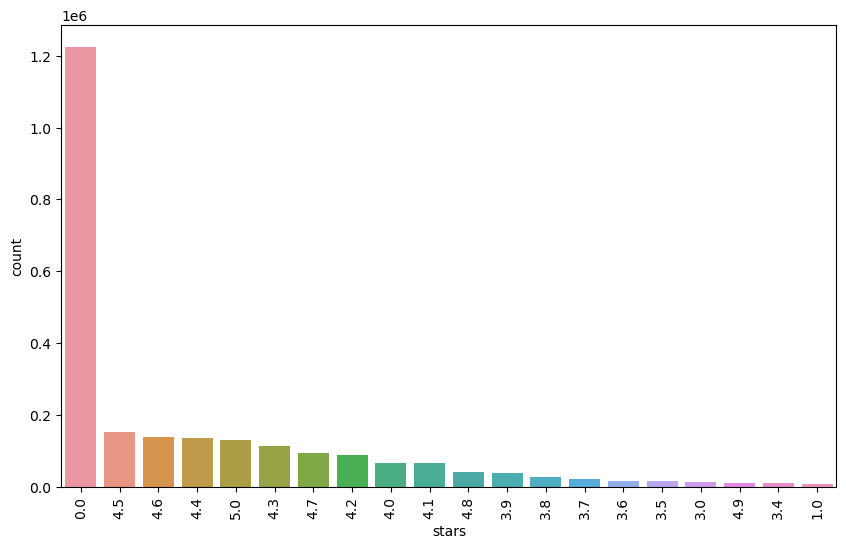

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, order=df['stars'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

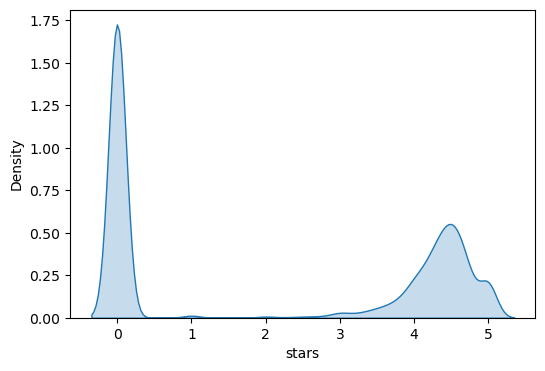

In [75]:
plt.figure(figsize=(6,4))  
sns.kdeplot(df['stars'], fill=True)
plt.xlabel('stars')
plt.ylabel('Density')
plt.show()